# Citation Profiles of AI papers
(ACL's reviewers told us to add this)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pickle
from pathlib import Path

In [2]:
df_ai_labeled = pd.read_csv("../data/df_ai_labeled.csv")
print(df_ai_labeled.shape)
df_ai_labeled.head()

(6085, 9)


,venue,count,label,NLP,Speech,ML,AI,CV,Robo
0,INTERSPEECH,10952,1.0,False,True,False,False,False,False
1,IJCAI,7456,1.0,False,False,False,True,False,False
2,AAAI,5831,1.0,False,False,False,True,False,False
3,LREC,5245,1.0,True,False,False,False,False,False
4,NIPS,3991,1.0,False,False,True,False,False,False


In [3]:
features = pd.read_csv("../data/features_v2_with_venue.csv")
print(features.shape)
features.head()

(945676, 91)


,paper_id,venue,venue_category,venue_is_top,pos_abstract_ADJ,pos_abstract_ADV,pos_abstract_ADP,pos_abstract_AUX,pos_abstract_CCONJ,pos_abstract_DET,...,rst_Manner-Means,rst_Topic-Comment,rst_Summary,rst_Temporal,rst_Topic-Change,rst_textual-organization,rst_same-unit,grammar_errors_abstract,grammar_errors_bodytext,outbound_citations_per_word
0,18981111,Journal of Special Education Technology,Other,0.0,0.172840,0.018519,0.154321,0.0,0.018519,0.154321,...,0.000,0.0,0.0,0.0,0.0,0.0,0.090909,5,88,0.002796
1,18982496,Publications,Other,0.0,0.081481,0.037037,0.162963,0.0,0.029630,0.118519,...,0.125,0.0,0.0,0.0,0.0,0.0,0.000000,3,51,0.007080
2,18983391,Canadian Conference on Electrical and Computer...,Other,0.0,0.093567,0.011696,0.157895,0.0,0.023392,0.152047,...,0.000,0.0,0.0,0.0,0.0,0.0,0.058824,2,70,0.001625
3,199668887,RecSys '19,Other,0.0,0.077320,0.056701,0.123711,0.0,0.046392,0.108247,...,0.000,0.0,0.0,0.0,0.0,0.0,0.000000,7,49,0.009973
4,199668943,ArXiv,Other,0.0,0.250000,0.044872,0.108974,0.0,0.044872,0.089744,...,0.000,0.0,0.0,0.0,0.0,0.0,0.111111,2,87,0.007781


In [4]:
def get_venue_names(option='EMNLP'):
    base_path = "../data/venue_name_labels"
    df = pd.read_csv(Path(base_path, f"{option}.csv"))
    D = {}
    for i, row in df.iterrows():
        D[row.venue] = row.label
    return D


venue_feat = features[features.venue.isin(get_venue_names("EMNLP_v_arxiv"))]

In [13]:
venues = [
        "AAAI_v_arxiv", "ACL_v_arxiv", "COLING", "CVPR_v_arxiv", 
        "EMNLP", "ICML_v_arxiv", "IJCAI",
        "NAACL", "NIPS"
    ]

all_venue_names = []
for v in venues:
    all_venue_names += get_venue_names(v)
    

564


['AAAI',
 'AAAI/IAAI',
 'AAAI Spring Symposia',
 'AAAI Fall Symposia',
 'AAAI 2020',
 'AAAI Workshops',
 'AAAI/IAAI, Vol. 2',
 'AAAI 2014',
 'AAAI Fall Symposium: Biologically Inspired Cognitive Architectures',
 'In AAAI']

In [14]:
cs_feat = features[features.venue.isin(all_venue_names)]
print(cs_feat.shape)
cs_feat.head()

(12747, 91)


,paper_id,venue,venue_category,venue_is_top,pos_abstract_ADJ,pos_abstract_ADV,pos_abstract_ADP,pos_abstract_AUX,pos_abstract_CCONJ,pos_abstract_DET,...,rst_Manner-Means,rst_Topic-Comment,rst_Summary,rst_Temporal,rst_Topic-Change,rst_textual-organization,rst_same-unit,grammar_errors_abstract,grammar_errors_bodytext,outbound_citations_per_word
93,850237,NIPS,ML,1.0,0.146341,0.012195,0.170732,0.0,0.024390,0.146341,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1,52,0.006655
121,16349522,2016 IEEE Conference on Computer Vision and Pa...,CV,1.0,0.096386,0.036145,0.156627,0.0,0.036145,0.132530,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0,14,0.005258
215,7209921,VL@COLING,NLP,0.0,0.155556,0.011111,0.155556,0.0,0.033333,0.088889,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.300000,3,24,0.002660
254,153312704,IJCAI,AI,1.0,0.147059,0.047059,0.141176,0.0,0.005882,0.158824,...,0.0,0.0,0.052632,0.0,0.0,0.0,0.105263,1,60,0.001176
432,8068740,ACL-IJCNLP: Short Papers,NLP,1.0,0.092593,0.074074,0.129630,0.0,0.018519,0.074074,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.090909,2,29,0.004357


In [6]:
cs_feat.annual_citations.describe()

count    12747.000000
mean         7.277242
std         67.783724
min          0.000000
25%          0.333333
50%          1.250000
75%          4.000000
max       6093.800000
Name: annual_citations, dtype: float64

<AxesSubplot:>

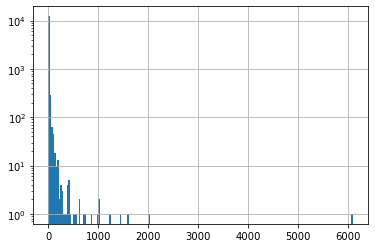

In [16]:
cs_feat.annual_citations.hist(bins=200, log=True)

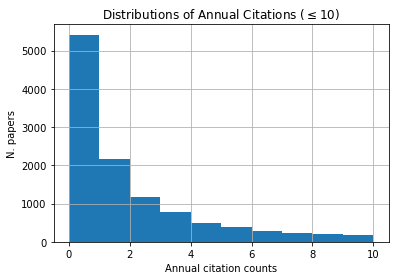

In [8]:
df1 = cs_feat[cs_feat.annual_citations<=10]
df1.annual_citations.hist(bins=10)
plt.title("Distributions of Annual Citations ($\leq$10)")
plt.xlabel("Annual citation counts")
plt.ylabel("N. papers")

plt.savefig("0507_plots/ai_citation_profile_0_10.svg")

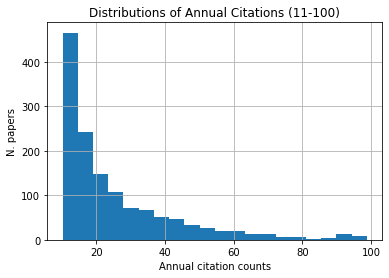

In [9]:
df2 = cs_feat[(cs_feat.annual_citations>10) & (cs_feat.annual_citations<100)]
df2.annual_citations.hist(bins=20)
plt.title("Distributions of Annual Citations (11-100)")
plt.xlabel("Annual citation counts")
plt.ylabel("N. papers")

plt.savefig("0507_plots/ai_citation_profile_11_100.svg")

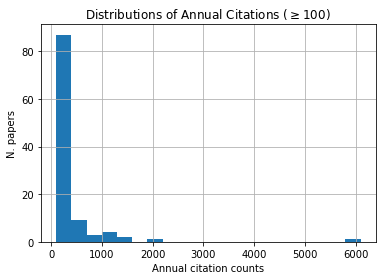

In [10]:
df3 = cs_feat[cs_feat.annual_citations>=100]
df3.annual_citations.hist(bins=20)
plt.title("Distributions of Annual Citations ($\geq$100)")
plt.xlabel("Annual citation counts")
plt.ylabel("N. papers")

plt.savefig("0507_plots/ai_citation_profile_100plus.svg")